In [22]:
# Metamodel_corrosion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import qmc
import scipy

In [23]:
# Lower values of the sample in the order from left to right

# Erev_H =1.8424
# b_H = 0.101
# del_H = 27000 -- eliminated
# a1_H = 0.4
# Iref_H = 0.04

####
# Iref_H2CO3 = 0.048
# a1H2CO3 = -0.6
# del_H2CO3 = 40000 -- eliminated



# cCO2ref_Fe = 0.02928
# Erev_Fe = -0.5100
# delH_Fe = 30000
# b_Fe = 0.03

In [24]:
# For python model

# Erev_H =1.8424
# b_H = 0.101
# del_H = 27000 -- eliminated
# del_H2CO3 = 40000 -- eliminated
# Iref_H = 0.04
# a1_H = 0.4
####
# Iref_H2CO3 = 0.048
# a1H2CO3 = -0.6
# cCO2ref_Fe = 0.02928
# delH_Fe = 30000
# Erev_Fe = -0.5100
# b_Fe = 0.03


# For 12 variable sampling
l_bounds = [-0.279,0.101,27000,40000,0.04,0.4,0.048,-0.6,0.02928,30000,-0.5100,0.03] # Lower bounds of all the input variables
u_bounds = [-0.186,0.131,33000,60000,0.06,0.6,0.072,-0.4,0.04392,45000,-0.3904,0.08] # Upper bounds of all the input variables

from_scratch = 1
ndv = 12 # no.of design variables
n = 3600 # 10 per ndv

#Erev_H	b_H	del_H	del_H2CO3	Iref_H	a1_H	Iref_H2CO3	a1_H2CO3	cCO2ref_fe	delHFe	Erev_Fe	b_Fe


#sample = pd.read_excel('1000samples_2812.xlsx',header=None)

if (from_scratch):
    
    sampler = qmc.LatinHypercube(d=12) 
    sample = sampler.random(n=n)
    # compute the quality of the sample using discrepancy criterion
    discrepancy = qmc.discrepancy(sample)
    x = qmc.scale(sample, l_bounds, u_bounds)
    column_names = ['Erev_H','b_H','del_H','del_H2CO3','Iref_H','a1_H',\
                    'Iref_H2CO3','a1_H2CO3','cCO2ref_fe','delHFe','Erev_Fe','b_Fe']
    print("discrepancy of the sample is {0:.2e} ".format(discrepancy))    

else:
    sample = pd.read_excel("filename.xlsx") # Sample from MATLAB code
    # compute the quality of the sample using discrepancy criterion
    discrepancy = qmc.discrepancy(sample)
    x = qmc.scale(sample, l_bounds, u_bounds)
    column_names = ["Erev_H_const","b_H","del_H","del_H2CO3","Iref_H","a1_H","Iref_H2CO3",\
                "a1_H2CO3","cCO2ref_Fe","delH_Fe","Erev_Fe","b_Fe"]
    print("discrepancy of the sample is {0:.2e}".format(discrepancy))




discrepancy of the sample is 1.95e-03 


In [25]:
df = pd.DataFrame(x)
df.columns = column_names

# Rounding off the activation energy values
df = df.round(4)
df['del_H'] = df['del_H'].round(0)
df['del_H2CO3'] = df['del_H2CO3'].round(0)
df['delHFe'] = df['delHFe'].round(0)

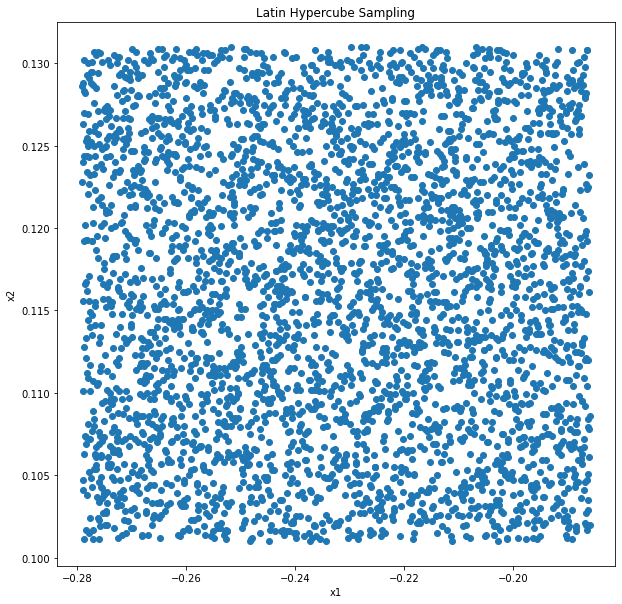

In [26]:
# Visulisation of sample points
plt.figure(figsize=(10,10))
plt.scatter(df['Erev_H'],df['b_H'])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Latin Hypercube Sampling")

# Save the file

df.to_excel("LHS_3600python.xlsx",index=False)

# To save as .txt - for COMSOL use
df_txt = df.T
df_txt.to_csv(r'LHS_3600python.txt', header=None, sep=' ')


In [19]:
pwd

'C:\\Users\\mnuyt\\OneDrive - University of Leeds\\PC050223\\Paper -  Rate constants\\Jupyter_notebooks'